# Zillow Neighborhood Shapes

Import python scientific suite

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy
import pylab

from collections import defaultdict

import cPickle as pickle

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division
%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Here, we set the directory where the neighborhood shape files are located

In [3]:
zfile_dir = '/Volumes/1TB_BAY/zillow_sets/'
ah = pd.read_csv(zfile_dir + 'Neighborhood_Zhvi_allhomes.csv') #all_homes

In [4]:
hood_dir = '/Volumes/1TB_BAY/zillow_sets/neighborhood_shapes/' #on my computer, the location of the neighborhood shape files
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'
fig_path = './paper/'

We will import the 'shapefile' package, which allows us to read in the neighborhood shape information, and also the 'Basemap' package, which allows us to superimpose background map imagery.

If you have conda, you can get the Basemap package by typing 

#conda install -c anaconda basemap=1.0.7

at the terminal

In [5]:
import shapefile
from mpl_toolkits.basemap import Basemap

In [6]:
myshp = open('merged.shp')
mydbf = open('merged.dbf')
sf = shapefile.Reader(shp = myshp, dbf = mydbf) #load all neighborhoods

In [7]:
len(sf.records()) #how many neighborhoods are there?

6958

In [8]:
nc = pd.read_csv('shape_bbox.txt', header = None).rename(columns = {1: 'ID'})
re = pd.DataFrame(sf.records()).rename(columns = {4: 'ID'}) #records

loc_records = pd.merge(nc, re, on = 'ID')
loc_records.rename(columns = {'0_x': 'loop_i', '2_x': 'lon','3_x': 'lat',4:'lon_width',5: 'lat_width','0_y': 'state',1: 'county', '2_y': 'city', '3_y':'neighborhood'}, inplace = True)
#loc_records[['loop_i','ID', 'state', 'county', 'city', 'neighborhood', 'lon', 'lat','lon_width','lat_width']].to_csv('neighborhood_locations.csv')

Here, we are drawing the Zillow Neighborhoods around the phoenix area, just to see what they look like!

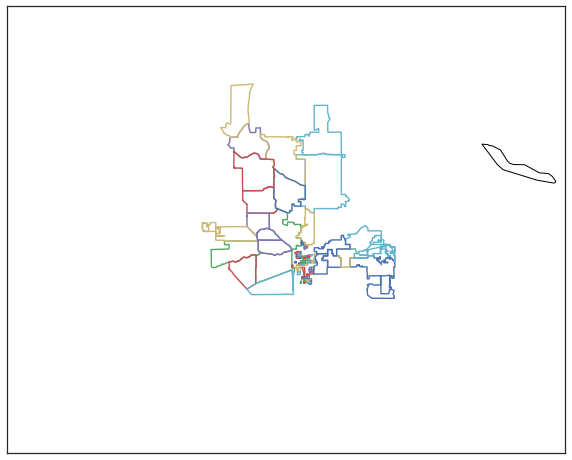

In [7]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=200000,height=160000,projection='lcc',
            resolution='h',lat_1=34.0,lat_2=34.5,lat_0=33.5, lon_0=-112.0)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    m.plot(x,y)

Let's read in the yelp dataset

In [9]:
b = pd.read_csv(file_dir + 'yelp_academic_dataset_business.csv') #b for business

/Users/Franklin/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
b[['name','business_id','longitude','latitude','stars','review_count','attributes.Price Range','categories']]

,name,business_id,longitude,latitude,stars,review_count,attributes.Price Range,categories
0,Mr Hoagie,5UmKMjUEUNdYWqANhGckJw,-79.900706,40.354327,4.5,4,1,"['Fast Food', 'Restaurants']"
1,Clancy's Pub,UsFtqoBl7naz8AVUBZMjQQ,-79.886814,40.350553,3.5,4,1,['Nightlife']
2,Joe Cislo's Auto,3eu6MEFlq2Dg7bQh8QbdOg,-79.889059,40.350956,5.0,3,NaN,"['Auto Repair', 'Automotive']"
3,Cool Springs Golf Center,cE27W9VPgO88Qxe4ol6y_g,-80.014660,40.354116,2.5,5,NaN,"['Active Life', 'Mini Golf', 'Golf']"
4,Verizon,HZdLhv6COCleJMo7nPl-RA,-80.059980,40.357620,2.5,5,2,"['Shopping', 'Home Services', 'Internet Servic..."
5,Emil's Lounge,mVHrayjG3uZ_RLHkLj-AMg,-79.880247,40.413464,5.0,20,1,"['Bars', 'American (New)', 'Nightlife', 'Loung..."
6,Extreme Fitness 2,VHYT1qgQw5JvXAlUDhTArA,-80.070897,40.390386,2.5,3,NaN,"['Active Life', 'Trainers', 'Fitness & Instruc..."
7,Alexion's Bar & Grill,KayYbHCt-RkbGcPdGOThNg,-80.067534,40.415517,4.0,21,1,"['Bars', 'American (Traditional)', 'Nightlife'..."
8,Flynn's Tire And Auto Service,b12U9TFESStdy7CsTtcOeg,-80.084454,40.394588,2.5,7,NaN,"['Auto Repair', 'Automotive', 'Tires']"
9,Forsythe Miniature Golf & Snacks,Sktj1eHQFuVa-M4bgnEh8g,-80.076267,40.405404,4.0,4,NaN,"['Active Life', 'Mini Golf']"


(33, 34)

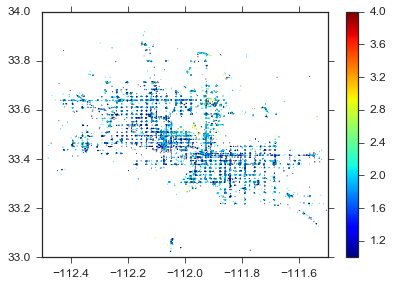

In [8]:
plt.scatter(b['longitude'], b['latitude'], lw = 0, s = 1, c = b['attributes.Price Range'], cmap = 'jet')
plt.colorbar()
plt.xlim(-112.5,-111.5)
plt.ylim(33,34)

Now, Let's draw the neighborhood borders for Phoenix, AZ, and plot all of the yelp businesses

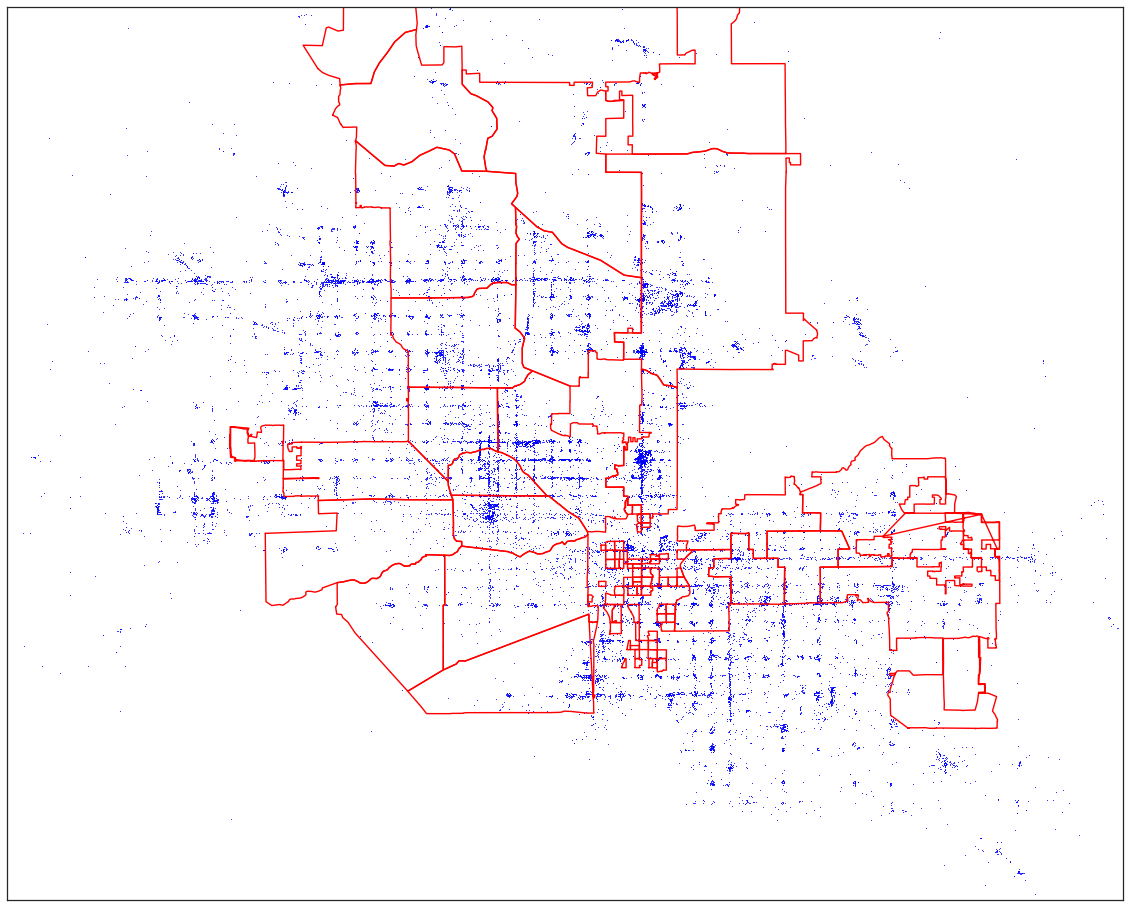

In [10]:
pylab.rcParams['figure.figsize'] = (20,16)

m = Basemap(width=100000,height=80000,projection='lcc',
            resolution='h',lat_1=34.0,lat_2=34.5,lat_0=33.5, lon_0=-112.0)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(b['longitude']), np.array(b['latitude']))
    m.plot(x,y, color = 'red')
    
m.scatter(bx,by, s = 1, lw = 0)
plt.savefig(fig_path + 'phx_test.png', dpi = 300, fmt = 'png')

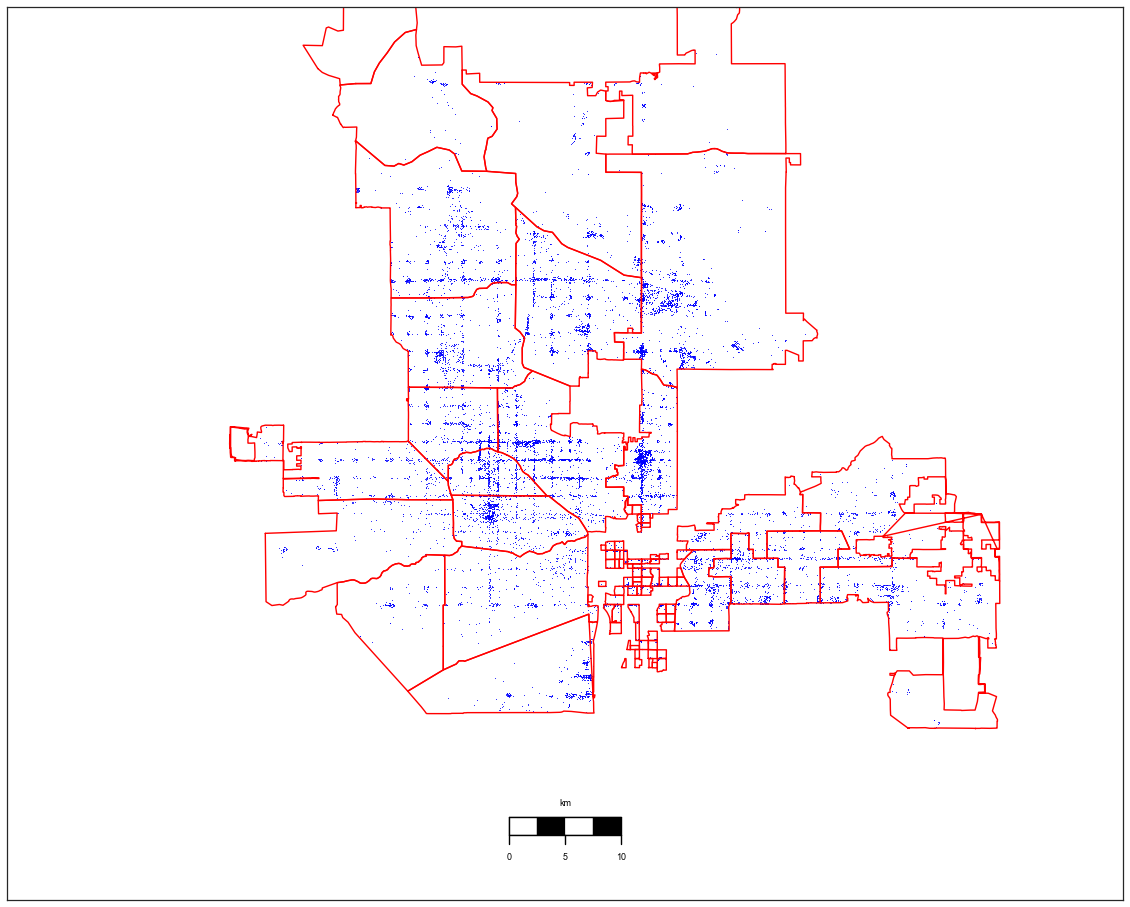

In [110]:
pylab.rcParams['figure.figsize'] = (20,16)

m = Basemap(width=100000,height=80000,projection='lcc',
            resolution='l',lat_0=33.5, lon_0=-112.0)
m.drawcoastlines()
m.drawmapscale(-112.0, 33.2, -112.0, 33.5, 20, barstyle='fancy', units='km', labelstyle='simple')

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(combo_b['longitude']), np.array(combo_b['latitude']))
    m.plot(x,y, color = 'red')
    
m.scatter(bx,by, s = 1, lw = 0)

plt.savefig(fig_path + 'phx_matches.png', dpi = 300, fmt = 'png')

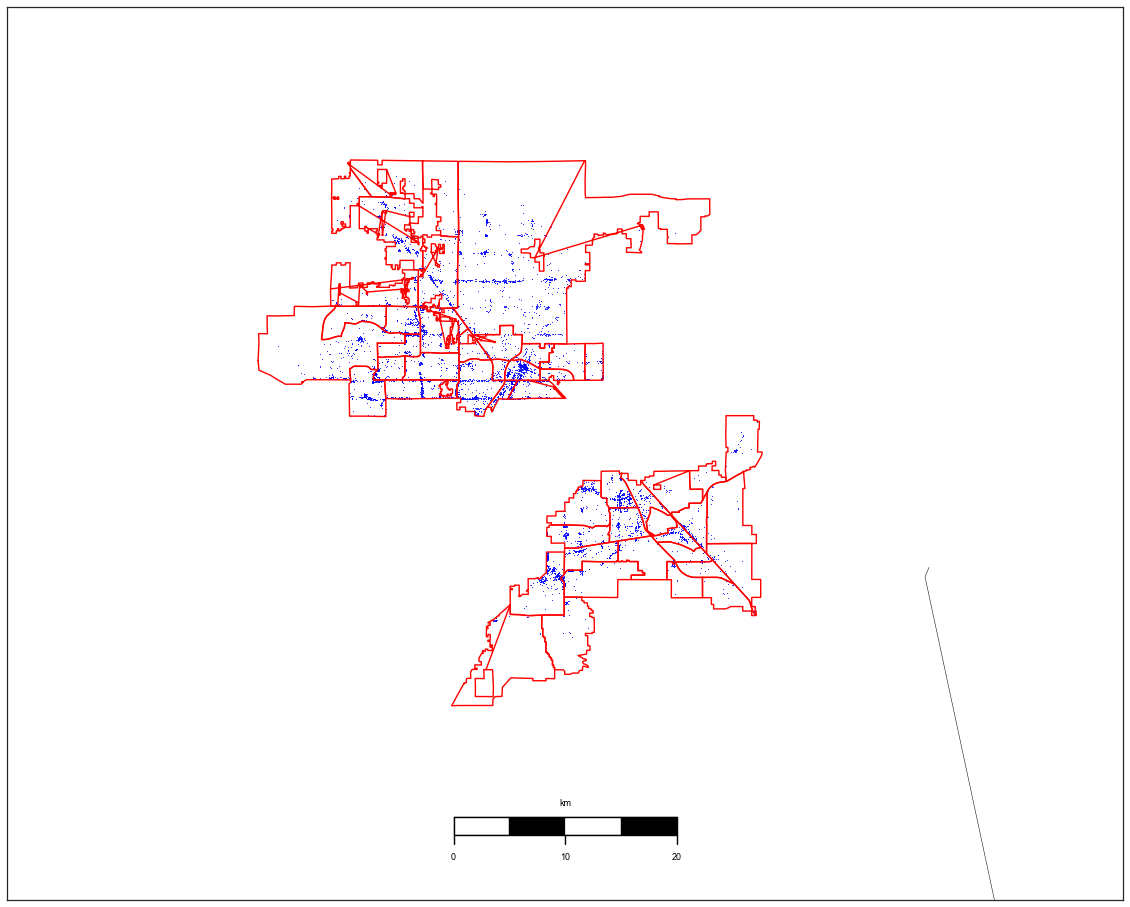

In [111]:
pylab.rcParams['figure.figsize'] = (20,16)

m = Basemap(width=100000,height=80000,projection='lcc',
            resolution='l', lat_0=36.1, lon_0=-115.1)
m.drawcoastlines()
#m.drawrivers()
m.drawmapscale(-115.1,35.8,-112.0,33.5,20, barstyle='fancy', units='km', labelstyle='simple')

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(combo_b['longitude']), np.array(combo_b['latitude']))
    m.plot(x,y, color = 'red')
    
m.scatter(bx,by, s = 1, lw = 0)
plt.savefig(fig_path + 'las_matches.png', dpi = 300, fmt = 'png')

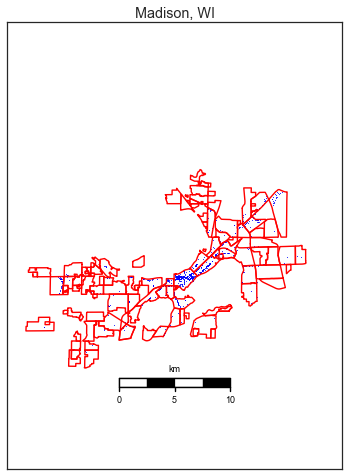

In [126]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=30000,height=20000,projection='lcc',
            resolution='l', lat_0=43.1, lon_0=-89.4)
m.drawcoastlines()
m.drawmapscale(-89.4,42.99,-89.4,43.1,10, barstyle='fancy', units='km', labelstyle='simple')

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(combo_b['longitude']), np.array(combo_b['latitude']))
    m.plot(x,y, color = 'red')
    
m.scatter(bx,by, s = 1, lw = 0)
plt.title('Madison, WI')
plt.savefig(fig_path + 'mad_matches.png', dpi = 300, fmt = 'png')

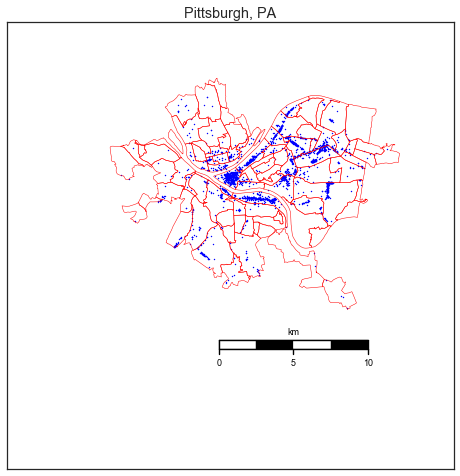

In [127]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=30000,height=30000,projection='lcc',
            resolution='h', lat_0=40.4, lon_0=-80.0)
m.drawcoastlines()
#m.drawrivers()
m.drawmapscale(-79.95,40.34,-80.0,40.4,10, barstyle='fancy', units='km', labelstyle='simple')

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(combo_b['longitude']), np.array(combo_b['latitude']))
    m.plot(x,y, color = 'red', lw = 0.5)
    
m.scatter(bx,by, s = 2, lw = 0)
plt.title('Pittsburgh, PA')
plt.savefig(fig_path + 'pit_matches.png', dpi = 300, fmt = 'png')

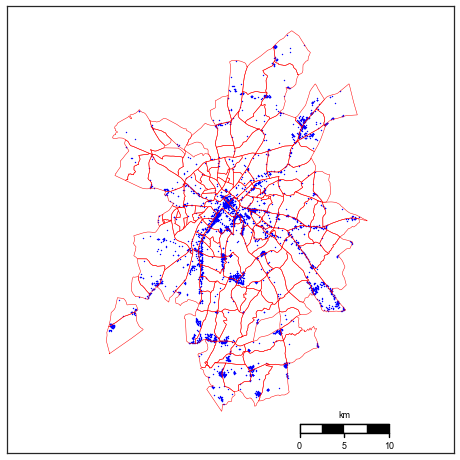

In [123]:
pylab.rcParams['figure.figsize'] = (10,8)

m = Basemap(width=50000,height=50000,projection='lcc',
            resolution='l', lat_0=35.20, lon_0=-80.84)
m.drawcoastlines()
m.drawrivers()
m.drawmapscale(-80.70,35.00,-80.84,35.20,10, barstyle='fancy', units='km', labelstyle='simple')

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(combo_b['longitude']), np.array(combo_b['latitude']))
    m.plot(x,y, color = 'red', lw = 0.5)
    
m.scatter(bx,by, s = 2, lw = 0)
plt.title('Charlotte, NC')
plt.savefig(fig_path + 'cha_matches.png', dpi = 300, fmt = 'png')

We need a way to check (for each business) which polygon the business is in.
The following code was stolen from: http://geospatialpython.com/2011/01/point-in-polygon.html

In [9]:
def point_in_poly(x,y,poly):

    n = len(poly)
    inside = False

    p1x,p1y = poly[0]
    for i in range(n+1):
        p2x,p2y = poly[i % n]
        if y > min(p1y,p2y):
            if y <= max(p1y,p2y):
                if x <= max(p1x,p2x):
                    if p1y != p2y:
                        xints = (y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                    if p1x == p2x or x <= xints:
                        inside = not inside
        p1x,p1y = p2x,p2y

    return inside

This is an attempt to find the zillow neighborhood corresponding to each yelp business. This loop works, however it is much too slow (would take over a year to run on the whole dataset). Finding the shape.points is the operation that is taking the majority of the time. We cannot loop over every neighborhood for each business. We will have to loop over only the 1 or two nearest neighborhoods for the code to run fast enough.

In [16]:
zillow_hood = []

for j in range(2): #for every yelp business
    print(j)
    for i in range(len(sf.shapes())): #for every zillow neighborhood
        print(i)
        if point_in_poly(b['longitude'][j],b['latitude'][j], sf.shapes()[i].points) == True:
            print('True')
            zillow_hood.append(sf.records()[i][-1:][0])
        else:
            print('False')
    
        print(zillow_hood)

0
0
False
[]
1
False
[]
2
False
[]
3
False
[]
4
False
[]
5
False
[]
6
False
[]
7
False
[]
8
False
[]
9
False
[]
10
False
[]
11
False
[]
12
False
[]
13
False
[]
14
False
[]
15


KeyboardInterrupt: 

We will need to find the nearest zillow neighborhoods to each yelp business. We will need to create a file of neighborhood centers. This next block creates a file that is formatted as follows:

ID, lon, lat, lon_width, lat_width

In [7]:
for i in range(0,len(sf.records())):
    myfile = open('shape_bbox2.txt','a')
    print(i)
    w_line = np.hstack((i,sf.records()[i][-1:][0],np.mean([sf.shapes()[i].bbox[0],sf.shapes()[i].bbox[2]]),np.mean([sf.shapes()[i].bbox[1],sf.shapes()[i].bbox[3]]), abs(sf.shapes()[i].bbox[0] - sf.shapes()[i].bbox[2]), abs(sf.shapes()[i].bbox[1] - sf.shapes()[i].bbox[3])))
    np.savetxt(myfile, w_line[None], newline = ' ', fmt = '%10.7f', delimiter = ',')
    myfile.write('\n')
    myfile.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

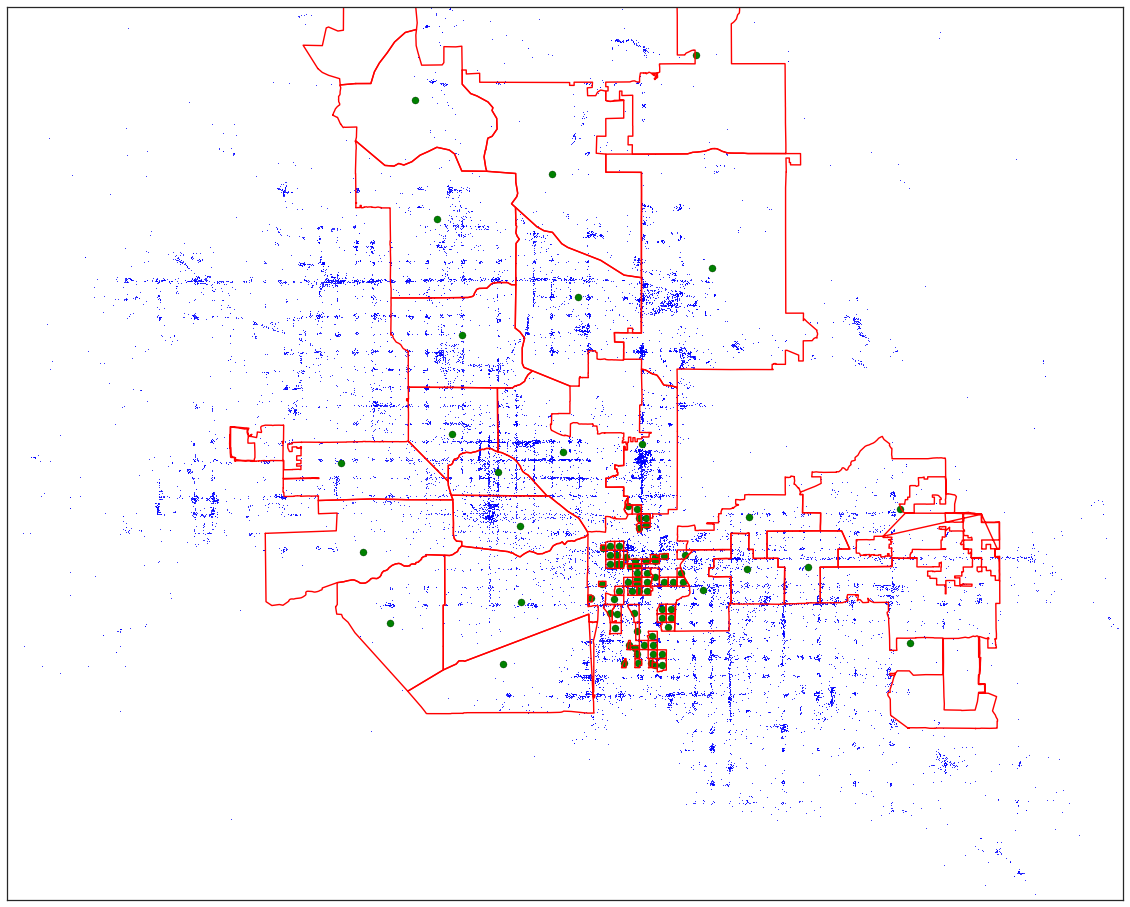

In [123]:
pylab.rcParams['figure.figsize'] = (20,16)

m = Basemap(width=100000,height=80000,projection='lcc',
            resolution='h',lat_1=34.0,lat_2=34.5,lat_0=33.5, lon_0=-112.0)
m.drawcoastlines()

for shape in sf.shapes():
    x,y = m(np.array(shape.points).T[0], np.array(shape.points).T[1])
    bx, by = m(np.array(b['longitude']), np.array(b['latitude']))
    cx, cy = m(np.array(nc[1]), np.array(nc[2]))
    m.plot(x,y, color = 'red')
    
m.scatter(bx,by, s = 1, lw = 0)
m.scatter(cx, cy, s = 50, c = 'green')

plt.savefig('phx_centers.png', dpi = 300, fmt = 'png')

In [10]:
from geopy.distance import great_circle # import a distance finding function

In [11]:
nl = pd.read_csv('neighborhood_locations.csv')
nl.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
bbox_edges = [] #bounding box edges

for i in range(len(nl)): #for a neighborhood in the list of neighborhoods
    
    bbox_edges.append([(nl['lon'][i] + nl['lon_width'][i]/2.0, nl['lat'][i] - nl['lat_width'][i]/2.0),\
                       (nl['lon'][i] + nl['lon_width'][i]/2.0, nl['lat'][i] + nl['lat_width'][i]/2.0),\
                       (nl['lon'][i] - nl['lon_width'][i]/2.0, nl['lat'][i] + nl['lat_width'][i]/2.0),\
                       (nl['lon'][i] - nl['lon_width'][i]/2.0, nl['lat'][i] - nl['lat_width'][i]/2.0),\
                       (nl['lon'][i] + nl['lon_width'][i]/2.0, nl['lat'][i] - nl['lat_width'][i]/2.0)])


In [ ]:
for i in range(0,len(sf.records())):
    myfile = open('shape_bbox2.txt','a')
    print(i)
    w_line = np.hstack((i,sf.records()[i][-1:][0],np.mean([sf.shapes()[i].bbox[0],sf.shapes()[i].bbox[2]]),np.mean([sf.shapes()[i].bbox[1],sf.shapes()[i].bbox[3]]), abs(sf.shapes()[i].bbox[0] - sf.shapes()[i].bbox[2]), abs(sf.shapes()[i].bbox[1] - sf.shapes()[i].bbox[3])))
    np.savetxt(myfile, w_line[None], newline = ' ', fmt = '%10.7f', delimiter = ',')
    myfile.write('\n')
    myfile.close()

In [ ]:
inclusions = defaultdict(list)

for j in range(49882,len(b)): #for every business
    myfile = open('inclusion_file2.txt','a')
    print('business: ' + str(j)) #print the business number
    inclusions[j].append(-999)
    
    for i in range(len(nl)): #for a neighborhood in the list of neighborhoods
        
        #if the business is within the bounding box of the neighborhood, add it to a list called 'inclusions'
    
        if (b['longitude'][j] <= nl['lon'][i] + nl['lon_width'][i]/2.0)\
        & (b['longitude'][j] >= nl['lon'][i] - nl['lon_width'][i]/2.0)\
        & (b['latitude'][j] >= nl['lat'][i] - nl['lat_width'][i]/2.0)\
        & (b['latitude'][j] <= nl['lat'][i] + nl['lat_width'][i]/2.0):
            inclusions[j].append(int(nl['loop_i'][i])) 
            
    w_line = np.hstack((j,inclusions[j]))
    np.savetxt(myfile, w_line, newline = ' ', fmt = '%10.7f', delimiter = ',')
    myfile.write('\n')
    myfile.close()

business: 49882
business: 49883
business: 49884
business: 49885
business: 49886
business: 49887
business: 49888
business: 49889
business: 49890
business: 49891
business: 49892
business: 49893
business: 49894
business: 49895
business: 49896
business: 49897
business: 49898
business: 49899
business: 49900
business: 49901
business: 49902
business: 49903
business: 49904
business: 49905
business: 49906
business: 49907
business: 49908
business: 49909
business: 49910
business: 49911
business: 49912
business: 49913
business: 49914
business: 49915
business: 49916
business: 49917
business: 49918
business: 49919
business: 49920
business: 49921
business: 49922
business: 49923
business: 49924
business: 49925
business: 49926
business: 49927
business: 49928
business: 49929
business: 49930
business: 49931
business: 49932
business: 49933
business: 49934
business: 49935
business: 49936
business: 49937
business: 49938
business: 49939
business: 49940
business: 49941
business: 49942
business: 49943
business

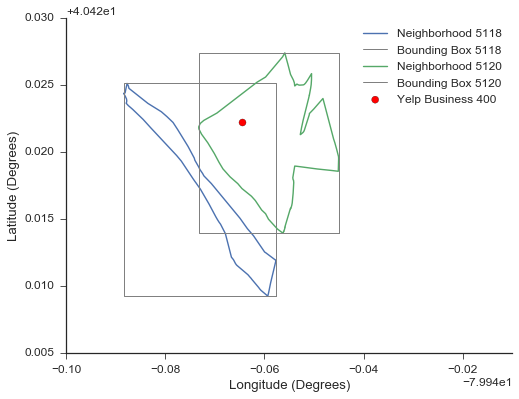

In [90]:
pylab.rcParams['figure.figsize'] = (8,6)

for hood in inclusions:
    plt.plot(np.array(sf.shapes()[hood].points).T[0], np.array(sf.shapes()[hood].points).T[1], label = 'Neighborhood ' + str(hood))
    plt.plot(np.array(bbox_edges[hood]).T[0], np.array(bbox_edges[hood]).T[1], c = 'grey', lw = 1, label = 'Bounding Box ' + str(hood))
plt.scatter(b['longitude'][j],b['latitude'][j], s = 50, label = 'Yelp Business ' + str(j), c = 'red')
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.xlim(-80.04,-79.95)
plt.legend()
sns.despine()
#plt.savefig(fig_path + 'bbox_example.png', fmt = 'png', dpi = 300)

In [10]:
dists = []

yelp_business = (b['longitude'][400],b['latitude'][400])

for i in range(len(nl)):
    zillow_hood = (nl['lon'][i], nl['lat'][i])
    dists.append((great_circle(yelp_business, zillow_hood).miles, nl['ID'][i], i))

dists = sorted(dists) #sort by distance
dists = pd.DataFrame(dists).head() #provide the closest five hoods

NameError: name 'nl' is not defined

In [9]:
bbox_matches = pickle.load(open("bbox_matches.p", "rb" ))

In [10]:
zillow_hood = pickle.load(open('id_map.p')) #mapping of zillow id to yelp id
zillow_idx = pickle.load(open('idx_map.p')) #mapping of zillow index to yelp index

In [72]:
for j in range(54495,len(b)): #for every yelp business
    print(j)
    for i in bbox_matches[j][1:]: #for each bounding box match
        if point_in_poly(b['longitude'][j],b['latitude'][j], sf.shapes()[int(i)].points) == True:
            #print('True')
            zillow_hood[b['business_id'][j]] = int(sf.records()[int(i)][-1:][0])
            zillow_idx[j] = int(i)
            
            pickle.dump(zillow_hood,open('id_map.p', 'w')) #dump the ids into a pickle file
            pickle.dump(zillow_idx,open('idx_map.p', 'w')) #dump the indexes into a picle file

54495
54496
54497
54498
54499
54500
54501
54502
54503
54504
54505
54506
54507
54508
54509
54510
54511
54512
54513
54514
54515
54516
54517
54518
54519
54520
54521
54522
54523
54524
54525
54526
54527
54528
54529
54530
54531
54532
54533
54534
54535
54536
54537
54538
54539
54540
54541
54542
54543
54544
54545
54546
54547
54548
54549
54550
54551
54552
54553
54554
54555
54556
54557
54558
54559
54560
54561
54562
54563
54564
54565
54566
54567
54568
54569
54570
54571
54572
54573
54574
54575
54576
54577
54578
54579
54580
54581
54582
54583
54584
54585
54586
54587
54588
54589
54590
54591
54592
54593
54594
54595
54596
54597
54598
54599
54600
54601
54602
54603
54604
54605
54606
54607
54608
54609
54610
54611
54612
54613
54614
54615
54616
54617
54618
54619
54620
54621
54622
54623
54624
54625
54626
54627
54628
54629
54630
54631
54632
54633
54634
54635
54636
54637
54638
54639
54640
54641
54642
54643
54644
54645
54646
54647
54648
54649
54650
54651
54652
54653
54654
54655
54656
54657
54658
54659
54660
5466

In [17]:
hood_df = pd.DataFrame({'business_id': zillow_hood.keys(), 'z_hood': zillow_hood.values()}) #dataframe of hood matches

In [19]:
combo_b = pd.merge(b, hood_df ,how = 'inner', on = 'business_id')

In [21]:
#combo_b.to_csv('yelp_business_with_neighborhood.csv')

In [84]:
mean_price = []
mean_stars = []
n_businesses = []
latest_zhvi = []

for hoodid in np.unique(combo_b['z_hood']):
    mean_price.append(np.mean(combo_b['attributes.Price Range'][(combo_b['z_hood'] == hoodid)]))
    mean_stars.append(np.mean(combo_b['stars'][(combo_b['z_hood'] == hoodid)]))
    n_businesses.append(len(combo_b['stars'][(combo_b['z_hood'] == hoodid)]))
    latest_zhvi.append(np.median(ah['2016-06'][(ah['RegionID'] == hoodid)]))


/Users/Franklin/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [82]:
np.median(ah['2016-06'][(ah['RegionID'] == combo_b['z_hood'][700])])

301700.0

In [85]:
static = pd.DataFrame({'mean_price': mean_price, 'mean_stars': mean_stars, 'n': n_businesses, 'latest_zhvi': latest_zhvi}) #static information
st_f = static[(static['n'] >= 20.0)] #filtered static

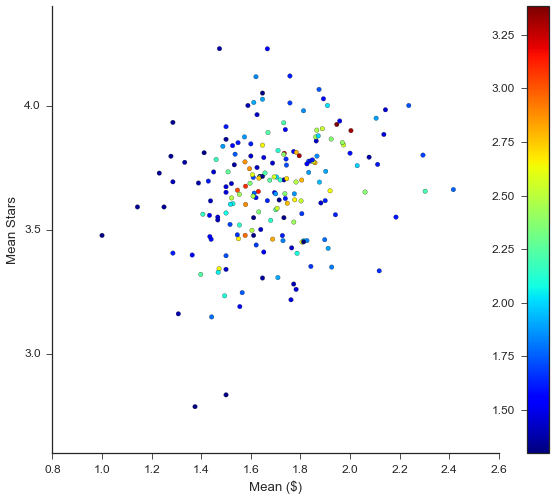

In [89]:
pylab.rcParams['figure.figsize'] = (10,8)
plt.figure()
plt.scatter(st_f['mean_price'], st_f['mean_stars'], c = np.log10(st_f['n']), cmap = 'jet')
plt.xlabel('Mean ($)')
plt.ylabel('Mean Stars')
plt.colorbar()
sns.despine()

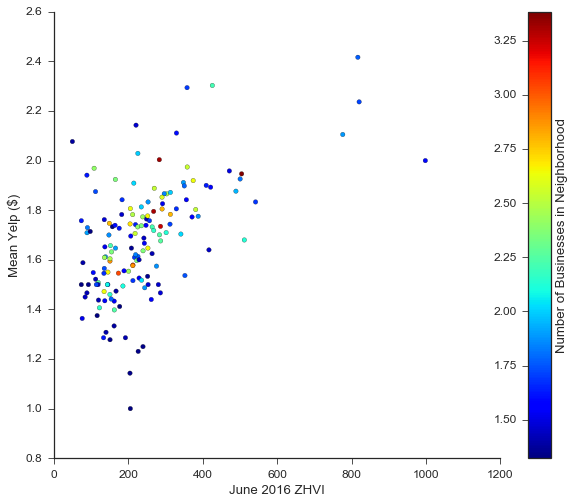

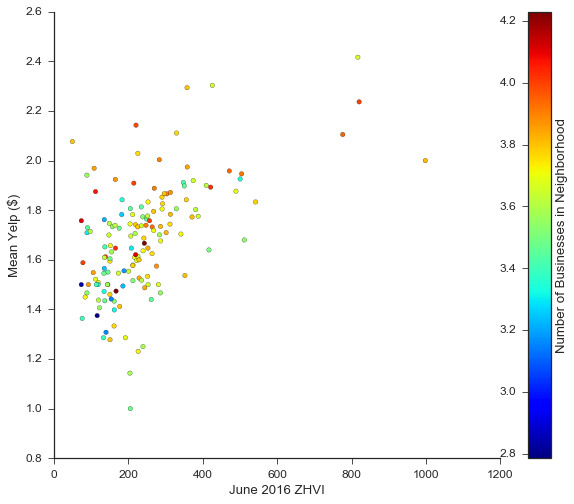

In [97]:
plt.figure()
plt.scatter(st_f['latest_zhvi']/1000.0, st_f['mean_price'], c = np.log10(st_f['n']), cmap = 'jet')
plt.xlabel('June 2016 ZHVI')
plt.ylabel('Mean Yelp ($)')
plt.colorbar(label = 'Number of Businesses in Neighborhood')
sns.despine()

plt.figure()
plt.scatter(st_f['latest_zhvi']/1000.0, st_f['mean_price'], c = st_f['mean_stars'], cmap = 'jet')
plt.xlabel('June 2016 ZHVI')
plt.ylabel('Mean Yelp ($)')
plt.colorbar(label = 'Mean Stars')
sns.despine()

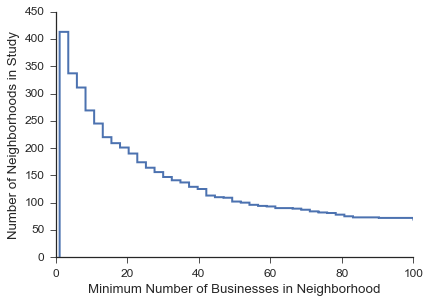

In [86]:
plt.hist(np.unique(zillow_hood.values(), return_counts = True)[1],\
         bins = 1000, cumulative = -1, lw = 2, histtype = 'step')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Neighborhoods in Study')
plt.xlabel('Minimum Number of Businesses in Neighborhood')
plt.xlim(0,100)
#plt.axhline(50)
#plt.axhline(100)
#plt.axhline(200)
sns.despine()
plt.savefig(fig_path + 'number_cutoff_2.png', dpi = 300, fmt = 'png')

(array([ 372.,   23.,    7.,    4.,    1.,    2.,    0.,    1.,    2.,    1.]),
 array([  1.00000000e+00,   2.42600000e+02,   4.84200000e+02,
          7.25800000e+02,   9.67400000e+02,   1.20900000e+03,
          1.45060000e+03,   1.69220000e+03,   1.93380000e+03,
          2.17540000e+03,   2.41700000e+03]),
 <a list of 10 Patch objects>)

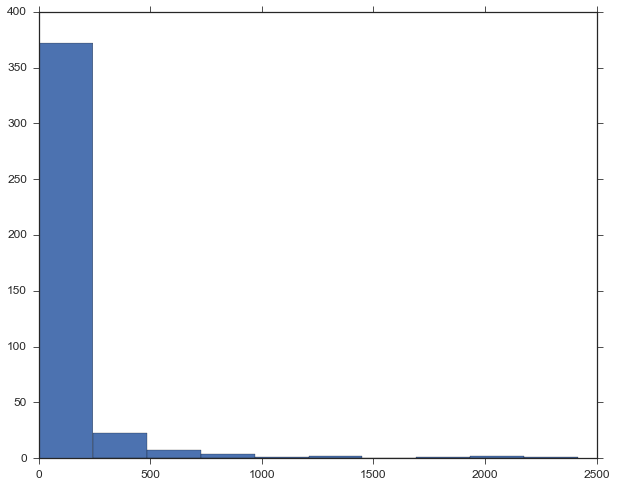

In [98]:
plt.hist(np.unique(zillow_hood.values(), return_counts = True)[1])

In [74]:
print('Mean Business per Hood: ' + str(np.mean(np.unique(zillow_hood.values(), return_counts = True)[1])))
print('Median Business per Hood: ' + str(np.median(np.unique(zillow_hood.values(), return_counts = True)[1])))

Mean Business per Hood: 93.4987893462
Median Business per Hood: 16.0


In [90]:
print(len(zillow_hood.values()))
print(len(b))
print(len(np.unique(zillow_hood.values())))

38615
77445
413


In [121]:
pd.DataFrame(columns = [zillow_hood.keys(), zillow_hood.values()], index = range(len(zillow_hood.keys())))

KeyboardInterrupt: 

In [95]:
neighborhood_counts = (np.unique(zillow_hood.values(), return_counts = True)[1])

In [117]:
print(sum(neighborhood_counts[(neighborhood_counts >= 1000.0)]))
print(len(neighborhood_counts[(neighborhood_counts >= 1000.0)]))

12022
7


Test that there is inclusion in the business-neighborhood pairs generated by the code. (looks good)

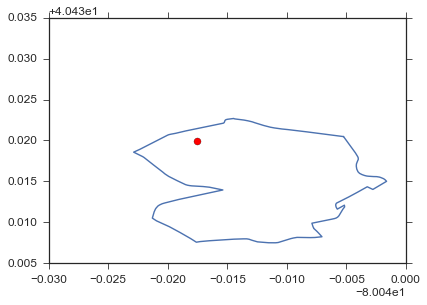

In [32]:
j = 116
hood = 5207

plt.scatter(b['longitude'][j],b['latitude'][j], s = 50, label = 'Yelp Business ' + str(j), c = 'red')
plt.plot(np.array(sf.shapes()[hood].points).T[0], np.array(sf.shapes()[hood].points).T[1], label = 'Neighborhood ' + str(hood))

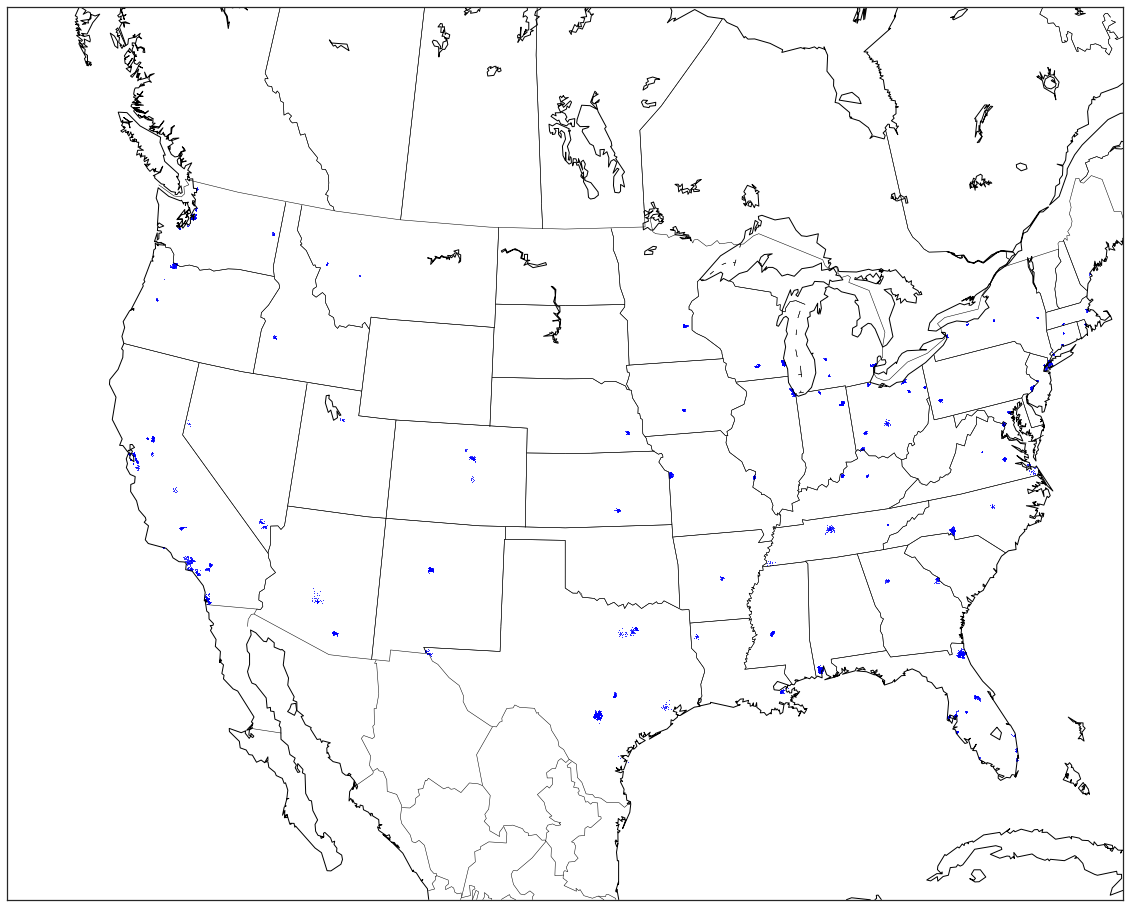

In [125]:
pylab.rcParams['figure.figsize'] = (20,16)

globe = Basemap(projection = 'lcc', resolution = 'l', lat_0 = 40, lon_0 = -100,\
               width=5000000,height=4000000)
zx, zy = globe(np.array(nl['lon']), np.array(nl['lat']))
#Fill the globe with a blue color 
globe.drawcountries()
globe.drawstates()
globe.drawcoastlines()
#Fill the continents with the land color
#globe.fillcontinents(color='coral',lake_color='aqua')
globe.scatter(zx,zy, s = 1, lw = 0)
plt.savefig('zillow_us_map.png', dpi = 300, fmt = 'png')

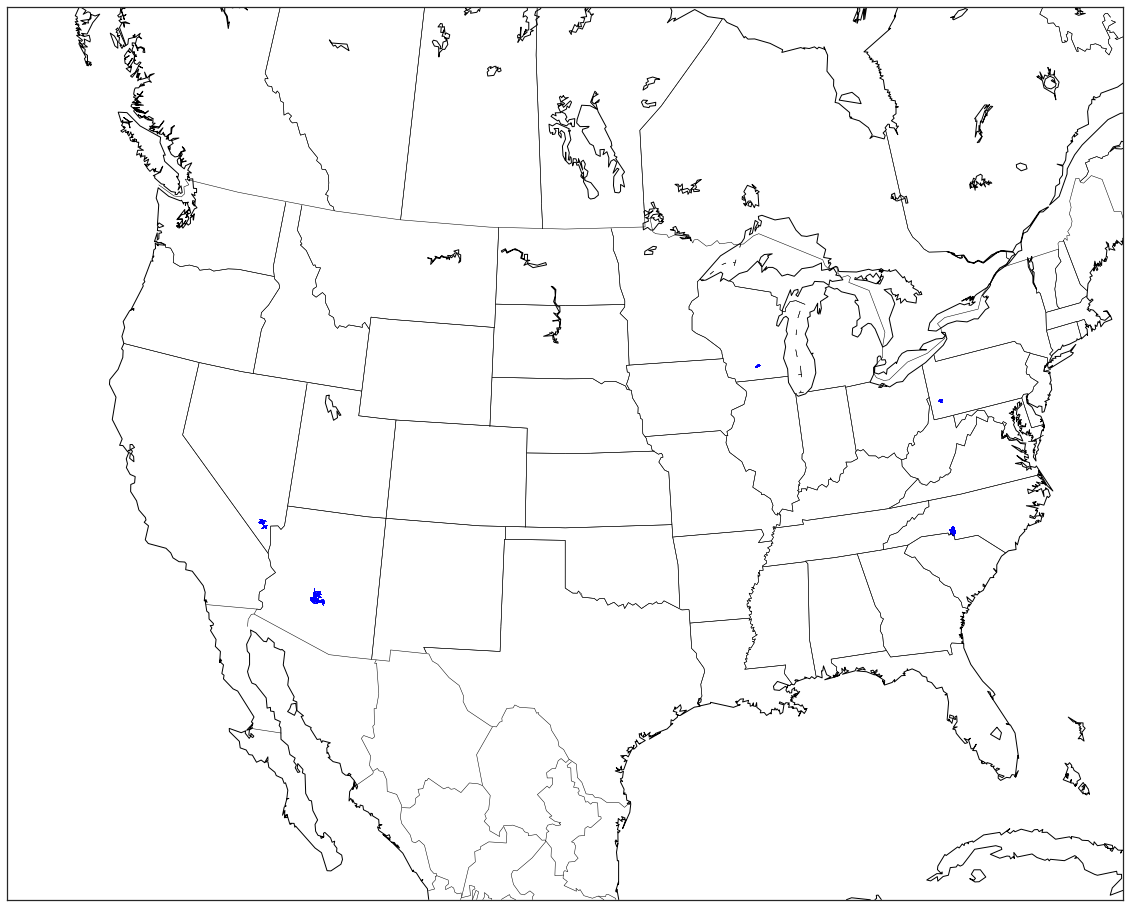

In [27]:
pylab.rcParams['figure.figsize'] = (20,16)

globe = Basemap(projection = 'lcc', resolution = 'l', lat_0 = 40, lon_0 = -100,\
               width=5000000,height=4000000)
zx, zy = globe(np.array(combo_b['longitude']), np.array(combo_b['latitude']))
#Fill the globe with a blue color 
globe.drawcountries()
globe.drawstates()
globe.drawcoastlines()
#Fill the continents with the land color
#globe.fillcontinents(color='coral',lake_color='aqua')
globe.scatter(zx,zy, s = 1, lw = 0)
plt.savefig('zillow_matches_us_map.png', dpi = 300, fmt = 'png')

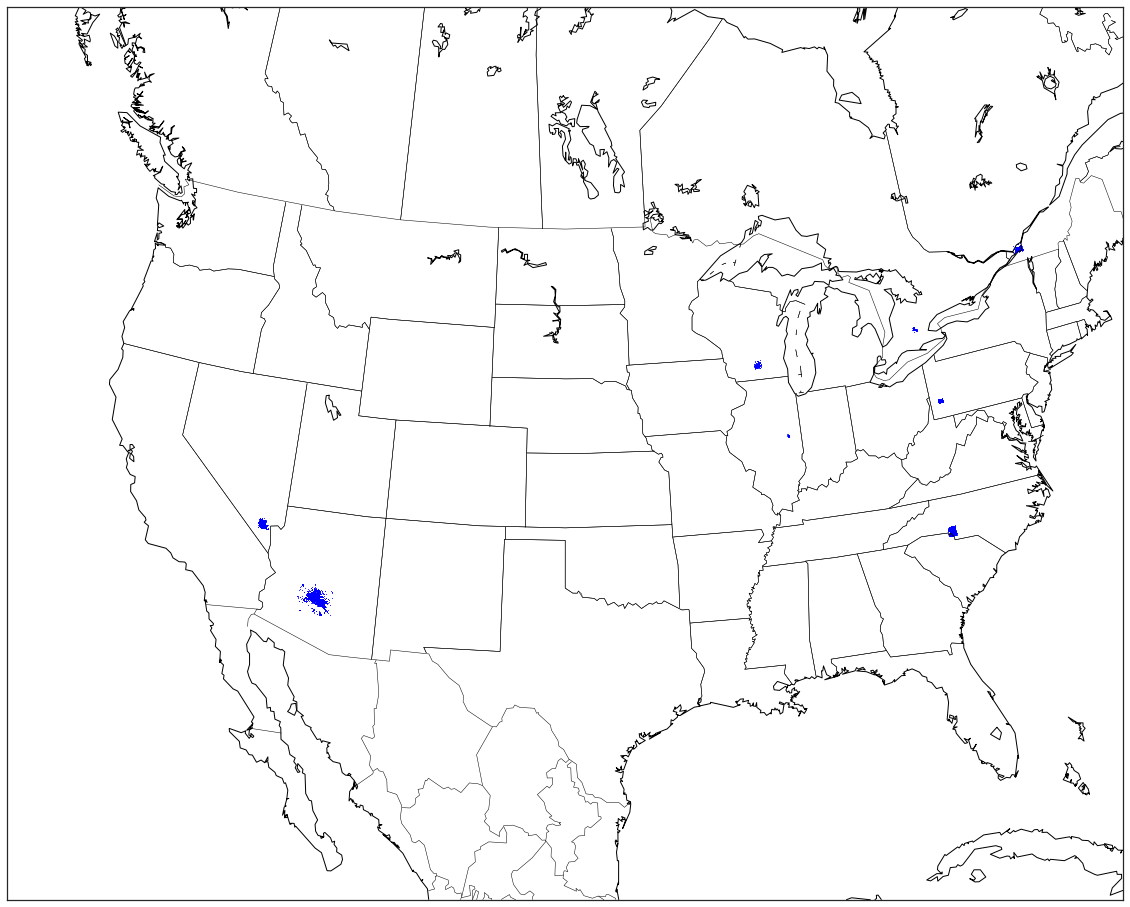

In [10]:
pylab.rcParams['figure.figsize'] = (20,16)

globe = Basemap(projection = 'lcc', resolution = 'l', lat_0 = 40, lon_0 = -100,\
               width=5000000,height=4000000)
yx, yy = globe(np.array(b['longitude']), np.array(b['latitude']))
#Fill the globe with a blue color 
globe.drawcountries()
globe.drawstates()
globe.drawcoastlines()
#Fill the continents with the land color
#globe.fillcontinents(color='coral',lake_color='aqua')
globe.scatter(yx,yy, s = 1, lw = 0)
plt.savefig('yelp_us_map.png', dpi = 300, fmt = 'png')